# Import Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/recruitment_efficiency_improved.csv'
df = pd.read_csv(path)
df.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79


# Cek struktur Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recruitment_id         5000 non-null   int64  
 1   department             5000 non-null   object 
 2   job_title              5000 non-null   object 
 3   num_applicants         5000 non-null   int64  
 4   time_to_hire_days      5000 non-null   int64  
 5   cost_per_hire          5000 non-null   float64
 6   source                 5000 non-null   object 
 7   offer_acceptance_rate  5000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 312.6+ KB


Semua tipe data sudah sesuai

In [ ]:
# Deskripsi Statistik Numerik
df.describe()

,recruitment_id,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,155.621000,47.191400,5214.826236,0.650832
std,1443.520003,84.164264,23.864934,2730.999185,0.202052
min,1.000000,10.000000,7.000000,507.160000,0.300000
25%,1250.750000,83.000000,26.000000,2820.597500,0.480000
50%,2500.500000,157.000000,47.000000,5218.290000,0.650000
75%,3750.250000,229.000000,67.000000,7611.412500,0.830000
max,5000.000000,299.000000,89.000000,9998.910000,1.000000


In [ ]:
# Deksripsi statistik Kategorikal
df.describe(include='object')

,department,job_title,source
count,5000,5000,5000
unique,6,24,4
top,HR,HR Coordinator,LinkedIn
freq,871,238,1291


# Cek missing Value, Duplicate Data

In [ ]:
df.isnull().sum()

,0
recruitment_id,0
department,0
job_title,0
num_applicants,0
time_to_hire_days,0
cost_per_hire,0
source,0
offer_acceptance_rate,0


Tidak ada missing value

In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ada duplicate Data

# Univariate Analisis

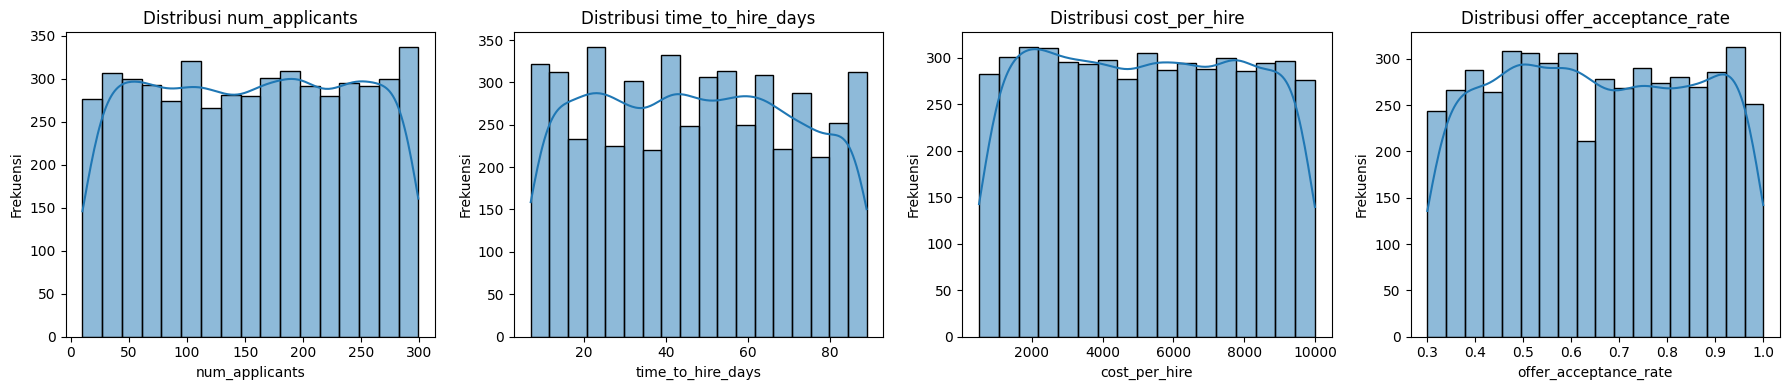

In [ ]:

# Distribusi kolom numeric

num_cols = ['num_applicants','time_to_hire_days','cost_per_hire','offer_acceptance_rate']

plt.figure(figsize=(18, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


# Deteksi Skew dan Outlier

In [ ]:
# Daftar kolom numerik
num_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

print("\n=== RINGKASAN ANALISIS NUMERIK ===")

outlier_summary = {}

for col in num_cols:
    # Hitung skewness
    skew_val = df[col].skew()

    # Hitung outlier dengan metode IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_summary[col] = outliers

    # === PRINT RINGKASAN ===
    print(f"\n▶ {col}")

    # Interpretasi skewness
    if skew_val > 1:
        print(f"   - Skewed Right (positif / condong kanan): {skew_val:.2f}")
    elif skew_val < -1:
        print(f"   - Skewed Left (negatif / condong kiri): {skew_val:.2f}")
    else:
        print(f"   - Distribusi mendekati normal: {skew_val:.2f}")

    # Interpretasi outlier
    if outliers > 0:
        print(f"   - Terdapat {outliers} outlier berdasarkan metode IQR.")
    else:
        print("   - Tidak ditemukan outlier signifikan.")



=== RINGKASAN ANALISIS NUMERIK ===

▶ num_applicants
   - Distribusi mendekati normal: -0.01
   - Tidak ditemukan outlier signifikan.

▶ time_to_hire_days
   - Distribusi mendekati normal: 0.04
   - Tidak ditemukan outlier signifikan.

▶ cost_per_hire
   - Distribusi mendekati normal: 0.02
   - Tidak ditemukan outlier signifikan.

▶ offer_acceptance_rate
   - Distribusi mendekati normal: 0.01
   - Tidak ditemukan outlier signifikan.



▶ Kolom: department
----------------------------------------
Jumlah kategori unik   : 6

Distribusi kategori:
             Frekuensi  Persentase (%)
department                            
HR                 871           17.42
Product            854           17.08
Finance            841           16.82
Sales              820           16.40
Marketing          811           16.22
Engineering        803           16.06

Tidak ada rare category (<1%).


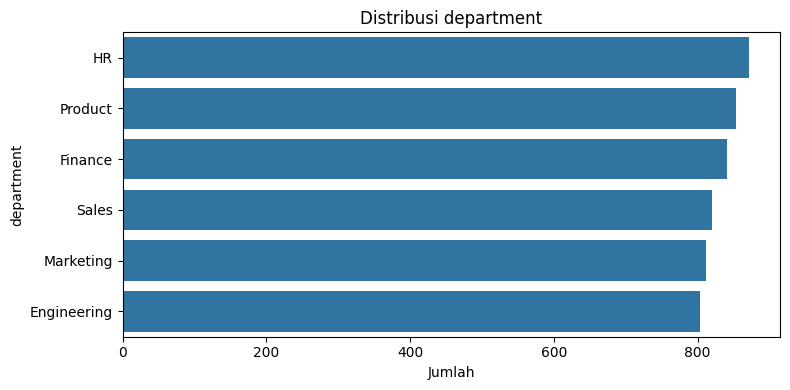


▶ Kolom: job_title
----------------------------------------
Jumlah kategori unik   : 24

Distribusi kategori:
                              Frekuensi  Persentase (%)
job_title                                              
HR Coordinator                      238            4.76
Financial Analyst                   234            4.68
UX Designer                         233            4.66
HR Manager                          223            4.46
Product Analyst                     221            4.42
Social Media Manager                217            4.34
Marketing Specialist                217            4.34
Business Development Manager        215            4.30
Data Engineer                       211            4.22
Talent Acquisition                  210            4.20
Payroll Specialist                  209            4.18
Software Engineer                   209            4.18
UI Designer                         206            4.12
Accountant                          205          

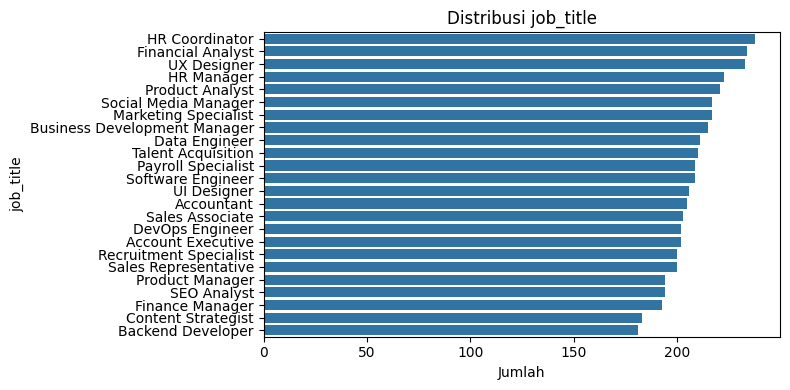


▶ Kolom: source
----------------------------------------
Jumlah kategori unik   : 4

Distribusi kategori:
            Frekuensi  Persentase (%)
source                               
LinkedIn         1291           25.82
Referral         1279           25.58
Recruiter        1221           24.42
Job Portal       1209           24.18

Tidak ada rare category (<1%).


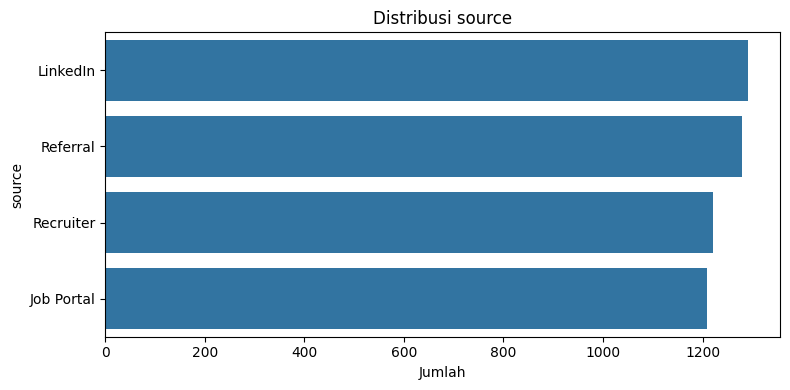

In [ ]:
# Distribusi kolom kategorikal
cat_cols = ['department', 'job_title', 'source']


for col in cat_cols:
    print(f"\n▶ Kolom: {col}")
    print("-" * 40)

    # 1. Jumlah kategori
    unique_count = df[col].nunique()
    print(f"Jumlah kategori unik   : {unique_count}")

    # 2. Frekuensi & persentase
    freq = df[col].value_counts()
    pct = df[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        'Frekuensi': freq,
        'Persentase (%)': pct.round(2)
    })

    print("\nDistribusi kategori:")
    print(summary)

    # 3. Deteksi rare category (< 1%)
    rare = summary[summary['Persentase (%)'] < 1]
    if len(rare) > 0:
        print("\n⚠️ Rare categories (<1%):")
        print(rare)
    else:
        print("\nTidak ada rare category (<1%).")

    # 4. Visualisasi
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=freq.index)
    plt.title(f'Distribusi {col}')
    plt.xlabel("Jumlah")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# Bivariate Analisis

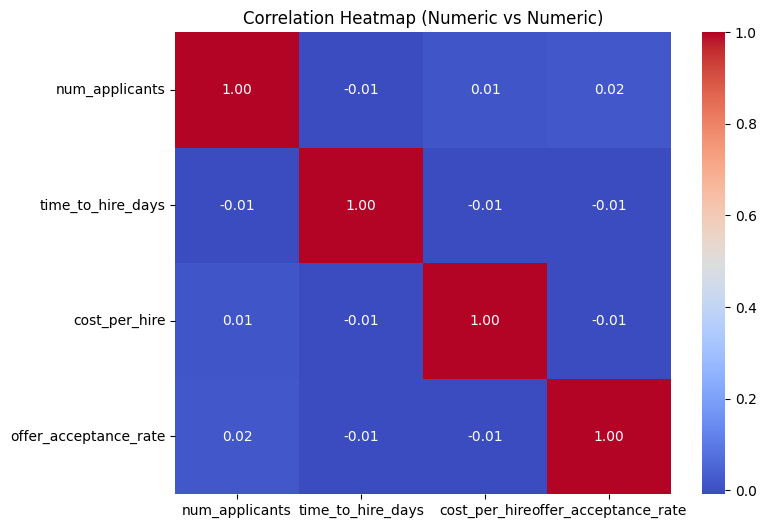

In [ ]:
# Heatmap hubungan Numeric dengan Numeric

plt.figure(figsize=(8,6))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric vs Numeric)")
plt.show()

## Rangkuman Analisis Korelasi (Numeric vs Numeric)

- Semua variabel numerik memiliki korelasi yang sangat rendah (sekitar −0.01 sampai 0.02).

- Tidak ada pasangan variabel yang menunjukkan hubungan linear yang berarti.

- Setiap fitur numerik bersifat independen dan tidak saling mempengaruhi
- Jumlah pelamar (num_applicants) tidak memiliki hubungan signifikan dengan waktu rekrut, biaya per hire, atau tingkat penerimaan offer.
- Waktu rekrut (time_to_hire_days) tidak berhubungan dengan biaya atau tingkat penerimaan offer.
- Biaya per hire (cost_per_hire) tidak berkaitan dengan jumlah pelamar atau offer acceptance rate.
- Offer acceptance rate juga tidak dipengaruhi oleh variabel numerik lainnya.

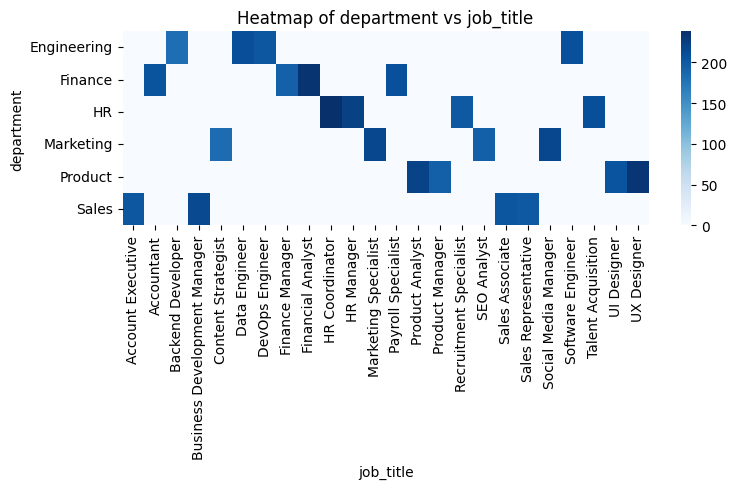

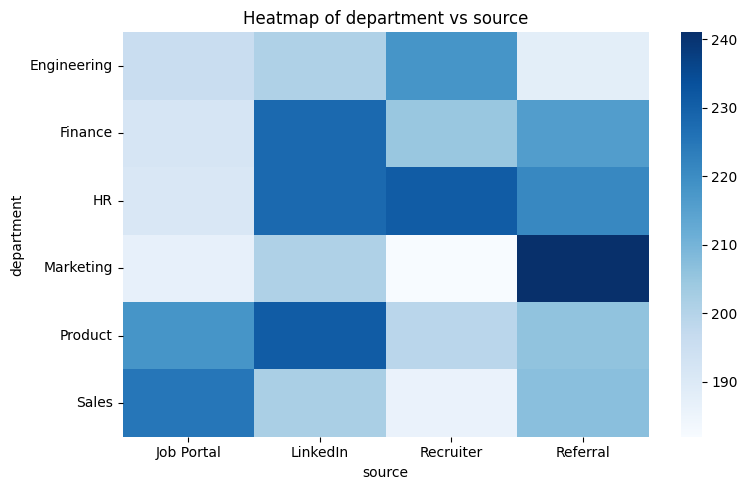

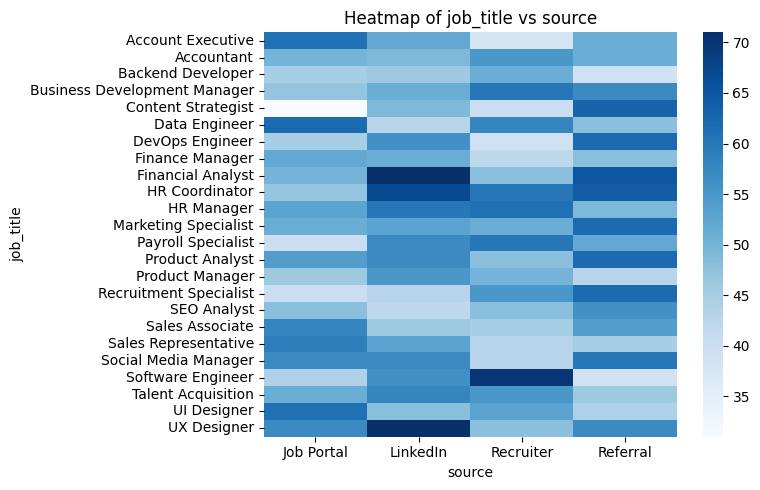

In [ ]:
# Hubungan Kategorikal vs Kategorikal

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        c1 = cat_cols[i]
        c2 = cat_cols[j]

        ct = pd.crosstab(df[c1], df[c2])

        plt.figure(figsize=(8,5))
        sns.heatmap(ct, annot=False, cmap="Blues")
        plt.title(f"Heatmap of {c1} vs {c2}")
        plt.xlabel(c2)
        plt.ylabel(c1)
        plt.tight_layout()
        plt.show()

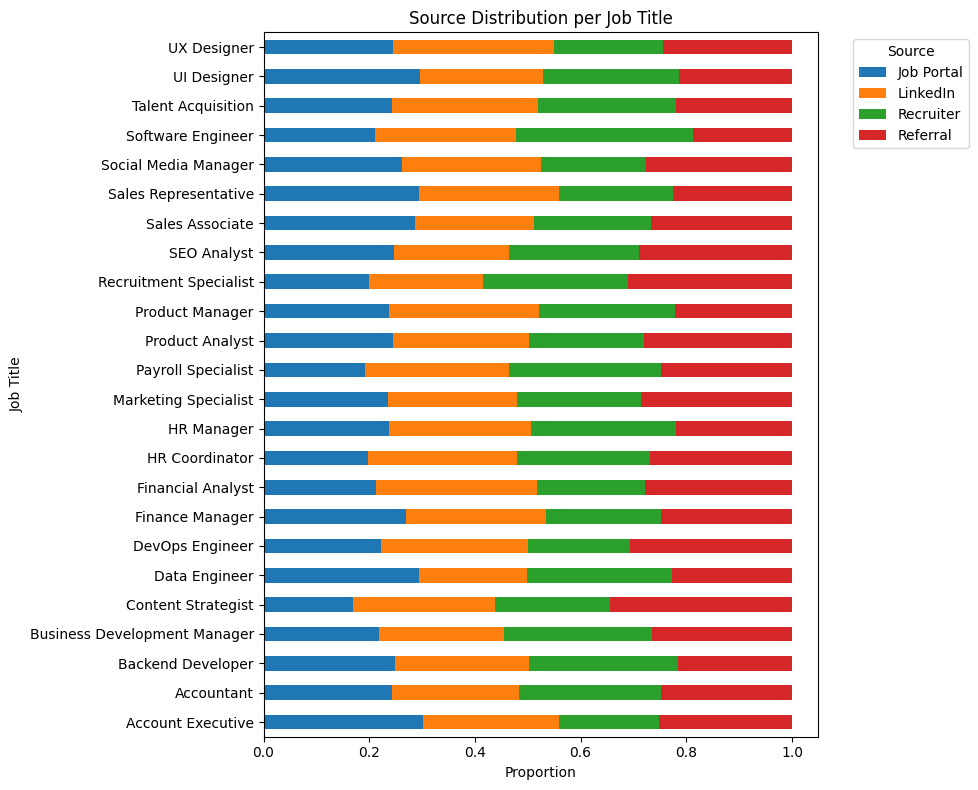

In [ ]:
job_source = pd.crosstab(df["job_title"], df["source"])
job_source_pct = job_source.div(job_source.sum(axis=1), axis=0)

job_source_pct.plot(
    kind="barh",
    stacked=True,
    figsize=(10,8)
)

plt.title("Source Distribution per Job Title")
plt.xlabel("Proportion")
plt.ylabel("Job Title")
plt.legend(title="Source", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


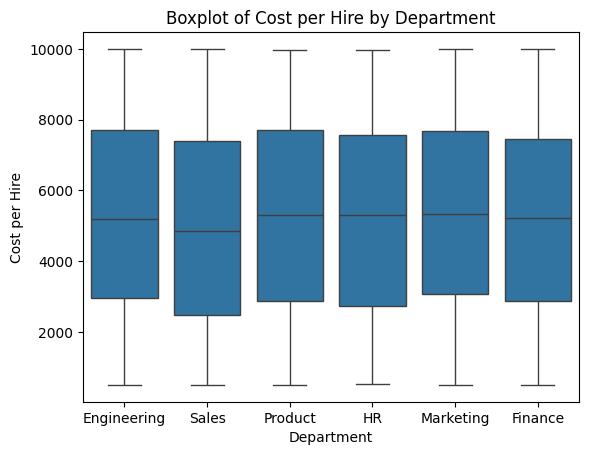

In [ ]:
# Cost Per hire by departement
sns.boxplot(x='department', y='cost_per_hire', data=df)
plt.title('Boxplot of Cost per Hire by Department')
plt.xlabel('Department')
plt.ylabel('Cost per Hire')
plt.show()

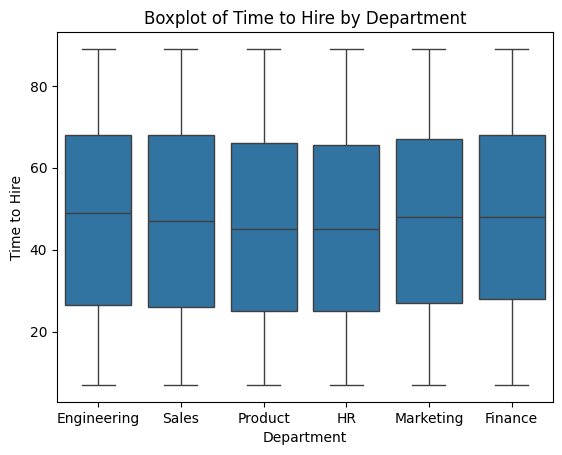

In [ ]:
# time to hire by departement
sns.boxplot(x='department', y='time_to_hire_days', data=df)
plt.title('Boxplot of Time to Hire by Department')
plt.xlabel('Department')
plt.ylabel('Time to Hire')
plt.show()

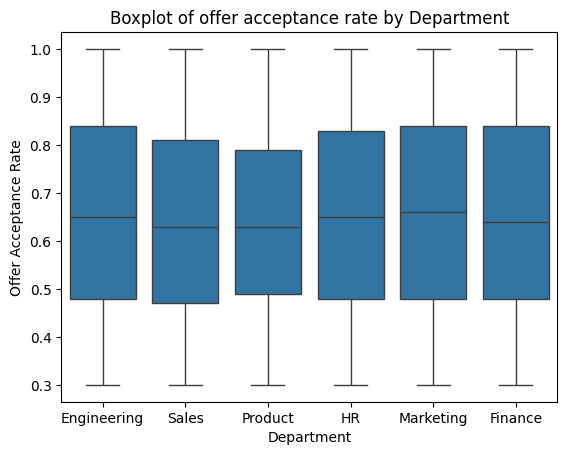

In [ ]:
# Offer Acceptance Rate by departement
sns.boxplot(x='department', y='offer_acceptance_rate', data=df)
plt.title('Boxplot of offer acceptance rate by Department')
plt.xlabel('Department')
plt.ylabel('Offer Acceptance Rate')
plt.show()

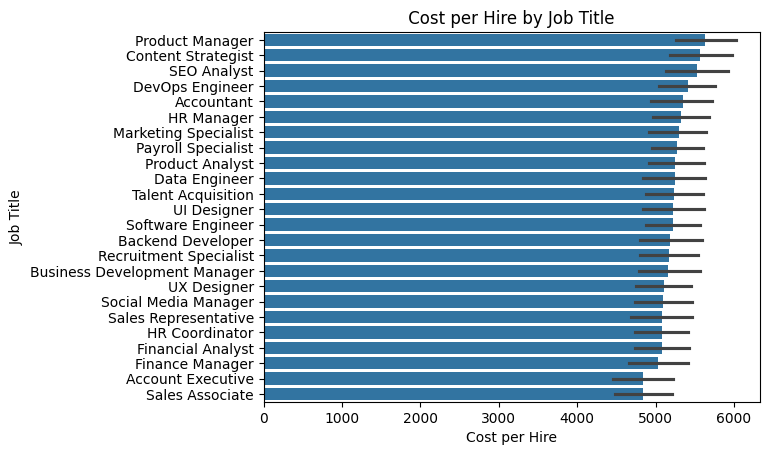

In [ ]:
# cost per hire tiap job title
order = (
    df.groupby('job_title')['cost_per_hire']
    .mean()
    .sort_values(ascending=False)
    .index
)

sns.barplot(
    y='job_title',
    x='cost_per_hire',
    data=df,
    order=order
)

plt.title(' Cost per Hire by Job Title ')
plt.xlabel('Cost per Hire')
plt.ylabel('Job Title')
plt.show()


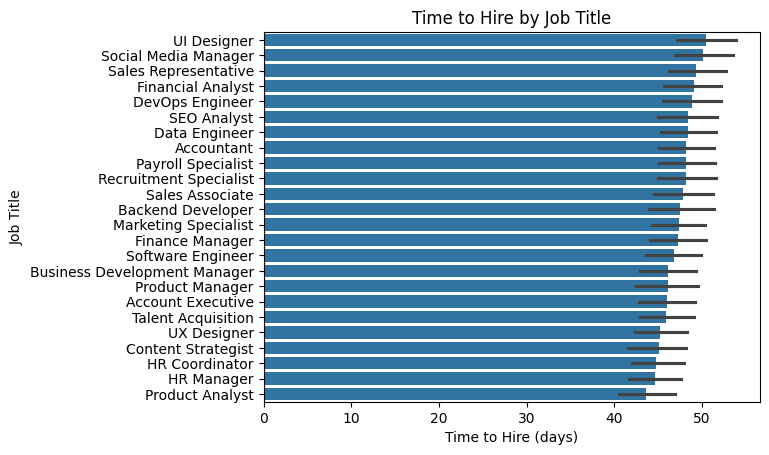

In [ ]:
# Time to hire untuk setiap job title
order = (
    df.groupby('job_title')['time_to_hire_days']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Horizontal bar plot
sns.barplot(
    y='job_title',
    x='time_to_hire_days',
    data=df,
    order=order
)

plt.title('Time to Hire by Job Title')
plt.xlabel('Time to Hire (days)')
plt.ylabel('Job Title')
plt.show()


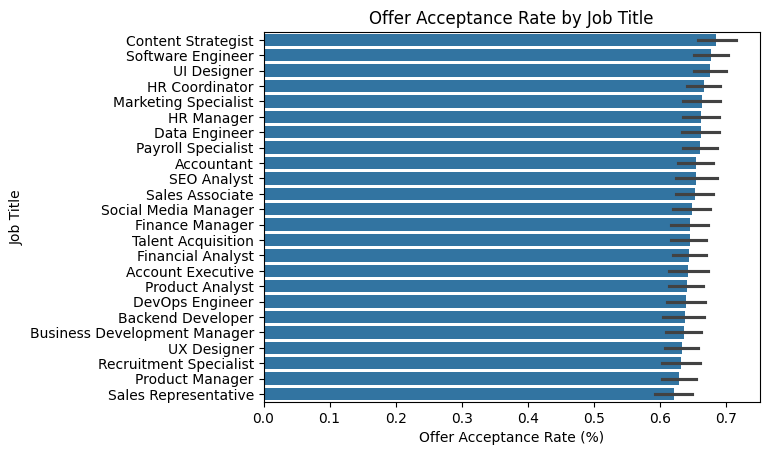

In [ ]:
# Over Acceptance Rate untuk tiap job title
order = (
    df.groupby('job_title')['offer_acceptance_rate']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Horizontal bar plot
sns.barplot(
    y='job_title',
    x='offer_acceptance_rate',
    data=df,
    order=order
)

plt.title('Offer Acceptance Rate by Job Title')
plt.xlabel('Offer Acceptance Rate (%)')
plt.ylabel('Job Title')
plt.show()


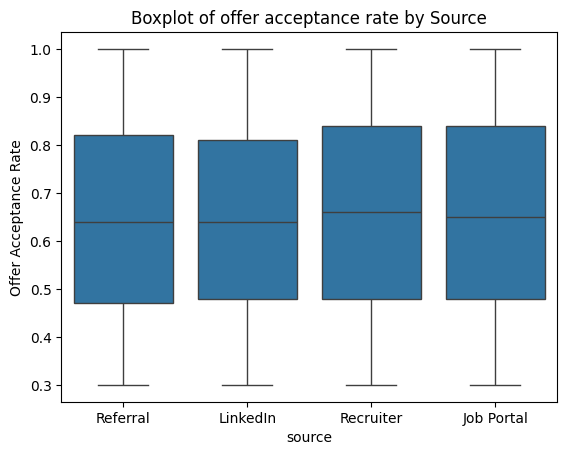

In [ ]:
# Offer Acceptance Rate by source
sns.boxplot(x='source', y='offer_acceptance_rate', data=df)
plt.title('Boxplot of offer acceptance rate by Source')
plt.xlabel('source')
plt.ylabel('Offer Acceptance Rate')
plt.show()

# Feature Engineering

# FE 1 (Acceptance Category)

In [6]:
# Acceptance Category
df2 = df.copy()
def acceptance_category(rate):
    if rate < 0.5:
        return "Likely Reject"
    elif rate <= 0.8:
        return "Uncertain"
    else:
        return "Likely Accept"

df2["acceptance_category"] = df2["offer_acceptance_rate"].apply(acceptance_category)


Membuat target variable dengan 3 kelas. Threshold yang dipilih (0.5 dan 0.8) membagi data menjadi segmen yang bermakna bisnis.

# FE 2 (Time to Hire Category)

In [7]:
# Time to Hire Category

def time_to_hire_category(days):
    if days <= 30:
        return "Fast"
    elif days <= 60:
        return "Medium"
    else:
        return "Slow"

df2["time_to_hire_category"] = df2["time_to_hire_days"].apply(time_to_hire_category)


Binning time to hire menjadi kategori. 30 hari = 1 bulan, 60 hari = 2 bulan adalah threshold bisnis yang masuk akal.

# FE 3 (Cost Per Hire Bucket)

In [8]:
# Cost Per hire Bucket

Q1 = df2["cost_per_hire"].quantile(0.25)
Q3 = df2["cost_per_hire"].quantile(0.75)

def cost_bucket(cost):
    if cost <= Q1:
        return "Low Cost"
    elif cost <= Q3:
        return "Medium Cost"
    else:
        return "High Cost"

df2["cost_bucket"] = df2["cost_per_hire"].apply(cost_bucket)


Menggunakan quartile untuk binning cost. Metode ini data-driven dan memastikan distribusi seimbang (25%-50%-25%).

# FE 4 (Applicant Pressure Index)

In [9]:
# Applicant Pressure Index
df2["applicant_pressure_index"] = (
    df2["num_applicants"] / df2["time_to_hire_days"]
)

Mengukur intensitas pelamar per hari. Business sense: Tinggi = banyak pelamar, waktu cepat = tekanan tinggi

# FE 5 (Cost Eficiency ratio)

In [10]:
df2["acceptance_category"].value_counts()


,count
acceptance_category,
Uncertain,2229
Likely Accept,1400
Likely Reject,1371


Cost per hari hiring. Tinggi = mahal tapi cepat vs Rendah = murah tapi lama. Good practice menghandle division by zero.

# FE 6 (Sourcing effort intensity)

In [11]:
# Sourcing effort intensity

# Hindari pembagian dengan nol
df2["cost_per_applicant"] = np.where(
    df2["num_applicants"] > 0,
    df2["cost_per_hire"] / df2["num_applicants"],
    0
)

Efisiensi sourcing. Semakin rendah, semakin efisien sourcing kandidat.

# FE 7 (Hire days per aplicant)

In [12]:
# Hire days per aplicant

# Hindari pembagian dengan nol
df2["hire_days_per_applicant"] = np.where(
    df2["num_applicants"] > 0,
    df2["time_to_hire_days"] / df2["num_applicants"],
    0
)

Berapa hari yang dibutuhkan per aplikasi yang masuk. Metric efisiensi proses.

# FE 8 (Difficulty Index)

In [13]:
# Menghitung indeks kesulitan (semakin tinggi, semakin sulit)
df2['difficulty_index'] = df2['time_to_hire_days'] * df2['cost_per_hire']

In [14]:
# scaling karena angkanya akan sangat besar
df2['difficulty_index_log'] = np.log1p(df2['difficulty_index'])

Menggabungkan time & cost. Lalu dilakukan Log transformation untuk mengatasi skewness dari perkalian. Business interpretation: Tinggi = sulit hire (lama DAN mahal)

# FE 9 (Acceptance Cost/Time Pressure)

In [15]:
df2['acceptance_cost_pressure'] = df2['cost_per_hire'] * (1 - df2['offer_acceptance_rate'])

In [16]:
df2['acceptance_time_pressure'] = df2['time_to_hire_days'] * (1 - df2['offer_acceptance_rate'])

Mengkombinasikan cost/time dengan rejection rate. Tinggi = biaya tinggi tapi banyak yang reject = tekanan tinggi

In [17]:
df2["acceptance_category"].value_counts()

,count
acceptance_category,
Uncertain,2229
Likely Accept,1400
Likely Reject,1371


In [21]:
df.sample(8)

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
584,585,Sales,Sales Representative,241,67,7383.97,Job Portal,0.53
1485,1486,Product,Product Analyst,165,45,1813.13,Recruiter,0.72
1364,1365,HR,HR Coordinator,229,70,6365.22,Recruiter,0.94
4533,4534,Marketing,SEO Analyst,299,58,9800.53,Job Portal,0.47
2667,2668,HR,Recruitment Specialist,272,51,8415.22,Referral,0.81
876,877,Product,Product Analyst,105,41,3303.18,Referral,0.76
1847,1848,Engineering,Software Engineer,161,23,5735.46,Recruiter,0.61
4487,4488,Engineering,DevOps Engineer,187,79,3409.02,Referral,0.58


In [22]:
df2.head(5)

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98,Likely Accept,Fast,Low Cost,11.666667,5.001357,0.085714,33609.12,10.422582,28.0076,0.48
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84,Likely Accept,Fast,Low Cost,37.428571,10.421565,0.026718,19113.15,9.858184,436.8720,1.12
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83,Likely Accept,Slow,Medium Cost,0.144737,480.556364,6.909091,401745.12,12.903576,898.6404,12.92
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49,Likely Reject,Fast,Medium Cost,9.153846,22.083109,0.109244,136650.28,11.825188,2680.4478,13.26
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79,Uncertain,Medium,Medium Cost,7.432432,18.134655,0.134545,184520.11,12.125519,1047.2763,7.77


In [23]:
df2.describe()

,recruitment_id,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,155.621000,47.191400,5214.826236,0.650832,5.048745,61.085187,0.555905,245534.703628,12.042901,1825.378380,16.518642
std,1443.520003,84.164264,23.864934,2730.999185,0.202052,5.663987,88.331976,0.816208,190586.582594,0.951671,1534.718204,13.596344
min,1.000000,10.000000,7.000000,507.160000,0.300000,0.113636,1.910751,0.024138,5193.720000,8.555398,0.000000,0.000000
25%,1250.750000,83.000000,26.000000,2820.597500,0.480000,1.769894,18.237620,0.170135,90226.542500,11.410090,556.570300,5.400000
50%,2500.500000,157.000000,47.000000,5218.290000,0.650000,3.217308,33.573295,0.310819,192787.745000,12.169350,1410.035150,12.835000
75%,3750.250000,229.000000,67.000000,7611.412500,0.830000,5.877679,62.498782,0.565006,360208.965000,12.794442,2753.030300,24.960000
max,5000.000000,299.000000,89.000000,9998.910000,1.000000,41.428571,945.073000,8.800000,881698.970000,13.689607,6906.067000,61.600000


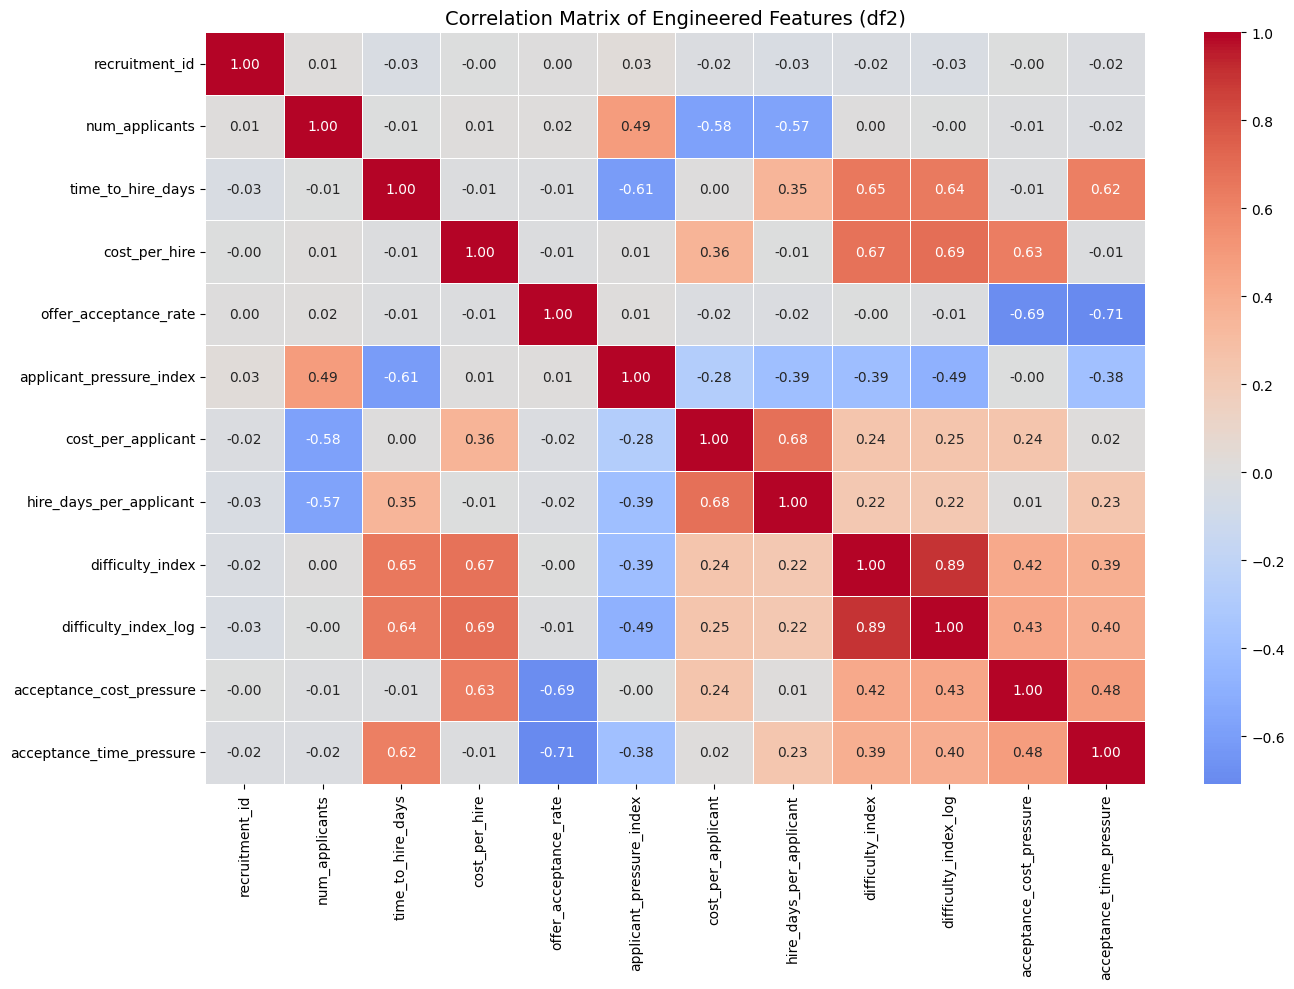

In [24]:
# Ambil hanya kolom numerik
df2_numeric = df2.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = df2_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix of Engineered Features (df2)', fontsize=14)
plt.tight_layout()
plt.show()

# Data Cleaning

In [25]:
# Copy Data
df_base = df2.copy()

In [26]:
df_base.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98,Likely Accept,Fast,Low Cost,11.666667,5.001357,0.085714,33609.12,10.422582,28.0076,0.48
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84,Likely Accept,Fast,Low Cost,37.428571,10.421565,0.026718,19113.15,9.858184,436.8720,1.12
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83,Likely Accept,Slow,Medium Cost,0.144737,480.556364,6.909091,401745.12,12.903576,898.6404,12.92
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49,Likely Reject,Fast,Medium Cost,9.153846,22.083109,0.109244,136650.28,11.825188,2680.4478,13.26
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79,Uncertain,Medium,Medium Cost,7.432432,18.134655,0.134545,184520.11,12.125519,1047.2763,7.77


In [27]:
# Categorical encoding maps (from training)
target_map = {'likely reject': 0, 'uncertain': 1, 'likely accept': 2}
time_map = {'Fast': 0, 'Medium': 1, 'Slow': 2}
cost_map = {'Low Cost': 0, 'Medium Cost': 1, 'High Cost': 2}

# Apply mappings
df_base['acceptance_category'] = df_base['acceptance_category'].str.lower().map(target_map)
df_base['time_to_hire_category'] = df_base['time_to_hire_category'].map(time_map)
df_base['cost_bucket'] = df_base['cost_bucket'].map(cost_map)

# Standardize categorical columns
cat_cols = ["job_title", "department", "source"]
for col in cat_cols:
    df_base[col] = df_base[col].str.strip().str.lower()

- Ordinal encoding sesuai karena ada urutan natural (reject < uncertain < accept).
- Menghindari masalah "HR " vs "hr" vs " HR". Best practice data cleaning.

In [28]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["department", "source", "job_title"]

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_base[col] = le.fit_transform(df_base[col])
    encoders[col] = le

In [29]:
df_base.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,1,0,20,280,24,1400.38,3,0.98,2,0,0,11.666667,5.001357,0.085714,33609.12,10.422582,28.0076,0.48
1,2,5,0,262,7,2730.45,1,0.84,2,0,0,37.428571,10.421565,0.026718,19113.15,9.858184,436.8720,1.12
2,3,4,23,11,76,5286.12,1,0.83,2,2,1,0.144737,480.556364,6.909091,401745.12,12.903576,898.6404,12.92
3,4,0,6,238,26,5255.78,2,0.49,0,0,1,9.153846,22.083109,0.109244,136650.28,11.825188,2680.4478,13.26
4,5,2,21,275,37,4987.03,1,0.79,1,1,1,7.432432,18.134655,0.134545,184520.11,12.125519,1047.2763,7.77


In [30]:
df_base.describe()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,2.506400,11.60680,155.621000,47.191400,5214.826236,1.514000,0.650832,1.005800,1.030800,1.000000,5.048745,61.085187,0.555905,245534.703628,12.042901,1825.378380,16.518642
std,1443.520003,1.695917,6.89444,84.164264,23.864934,2730.999185,1.115909,0.202052,0.744498,0.795473,0.707178,5.663987,88.331976,0.816208,190586.582594,0.951671,1534.718204,13.596344
min,1.000000,0.000000,0.00000,10.000000,7.000000,507.160000,0.000000,0.300000,0.000000,0.000000,0.000000,0.113636,1.910751,0.024138,5193.720000,8.555398,0.000000,0.000000
25%,1250.750000,1.000000,6.00000,83.000000,26.000000,2820.597500,1.000000,0.480000,0.000000,0.000000,0.750000,1.769894,18.237620,0.170135,90226.542500,11.410090,556.570300,5.400000
50%,2500.500000,2.000000,11.00000,157.000000,47.000000,5218.290000,1.500000,0.650000,1.000000,1.000000,1.000000,3.217308,33.573295,0.310819,192787.745000,12.169350,1410.035150,12.835000
75%,3750.250000,4.000000,18.00000,229.000000,67.000000,7611.412500,3.000000,0.830000,2.000000,2.000000,1.250000,5.877679,62.498782,0.565006,360208.965000,12.794442,2753.030300,24.960000
max,5000.000000,5.000000,23.00000,299.000000,89.000000,9998.910000,3.000000,1.000000,2.000000,2.000000,2.000000,41.428571,945.073000,8.800000,881698.970000,13.689607,6906.067000,61.600000


In [31]:

# Drop Recruitment ID
df_base = df_base.drop(columns=['recruitment_id', 'offer_acceptance_rate', 'difficulty_index', 'time_to_hire_days', 'cost_per_hire'])

- recruitment_id dihapus karena bukan fitur, hanya bersifat identitas.
- Offer_acceptance_rate di hapus karena akan menyebabkan data leakage dan target dibuat dari kolom ini.
- difficulty_index dihapus karena sudah ada versi log.
- time_to_hire_days & cost_per_hire - Dropped karena sudah di-scale & ada feature engineering-nya

In [32]:
df_base.head(5)

,department,job_title,num_applicants,source,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,0,20,280,3,2,0,0,11.666667,5.001357,0.085714,10.422582,28.0076,0.48
1,5,0,262,1,2,0,0,37.428571,10.421565,0.026718,9.858184,436.8720,1.12
2,4,23,11,1,2,2,1,0.144737,480.556364,6.909091,12.903576,898.6404,12.92
3,0,6,238,2,0,0,1,9.153846,22.083109,0.109244,11.825188,2680.4478,13.26
4,2,21,275,1,1,1,1,7.432432,18.134655,0.134545,12.125519,1047.2763,7.77


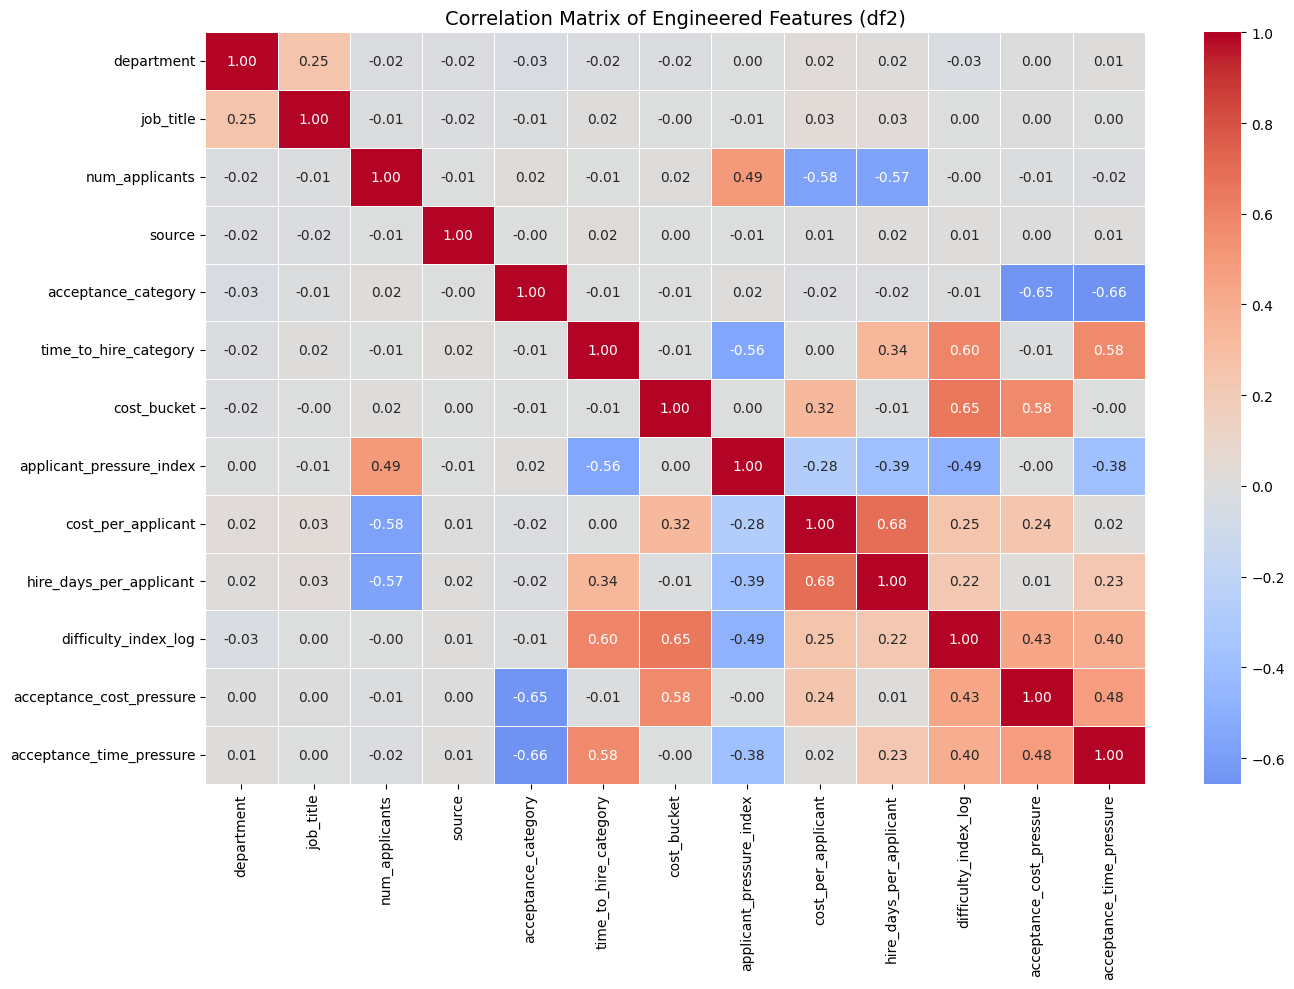

In [33]:
# Ambil hanya kolom numerik
df_base_numeric = df_base.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = df_base_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix of Engineered Features (df2)', fontsize=14)
plt.tight_layout()
plt.show()

In [34]:
# Copy Data
df_final = df_base.copy()

In [35]:
df_final.head()

,department,job_title,num_applicants,source,acceptance_category,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,0,20,280,3,2,0,0,11.666667,5.001357,0.085714,10.422582,28.0076,0.48
1,5,0,262,1,2,0,0,37.428571,10.421565,0.026718,9.858184,436.8720,1.12
2,4,23,11,1,2,2,1,0.144737,480.556364,6.909091,12.903576,898.6404,12.92
3,0,6,238,2,0,0,1,9.153846,22.083109,0.109244,11.825188,2680.4478,13.26
4,2,21,275,1,1,1,1,7.432432,18.134655,0.134545,12.125519,1047.2763,7.77


In [36]:
df2.iloc[1]

,1
recruitment_id,2
department,Sales
job_title,Account Executive
num_applicants,262
time_to_hire_days,7
cost_per_hire,2730.45
source,LinkedIn
offer_acceptance_rate,0.84
acceptance_category,Likely Accept
time_to_hire_category,Fast


In [37]:

list(enumerate(encoders["department"].classes_))

[(0, 'engineering'),
 (1, 'finance'),
 (2, 'hr'),
 (3, 'marketing'),
 (4, 'product'),
 (5, 'sales')]

In [38]:
list(enumerate(encoders["source"].classes_))

[(0, 'job portal'), (1, 'linkedin'), (2, 'recruiter'), (3, 'referral')]

In [39]:
list(enumerate(encoders["job_title"].classes_))

[(0, 'account executive'),
 (1, 'accountant'),
 (2, 'backend developer'),
 (3, 'business development manager'),
 (4, 'content strategist'),
 (5, 'data engineer'),
 (6, 'devops engineer'),
 (7, 'finance manager'),
 (8, 'financial analyst'),
 (9, 'hr coordinator'),
 (10, 'hr manager'),
 (11, 'marketing specialist'),
 (12, 'payroll specialist'),
 (13, 'product analyst'),
 (14, 'product manager'),
 (15, 'recruitment specialist'),
 (16, 'sales associate'),
 (17, 'sales representative'),
 (18, 'seo analyst'),
 (19, 'social media manager'),
 (20, 'software engineer'),
 (21, 'talent acquisition'),
 (22, 'ui designer'),
 (23, 'ux designer')]

In [40]:
# output Result df 3 untuk modeling
X = df_final.drop(columns=["acceptance_category"]) # Features / Variabel Input
y = df_final["acceptance_category"] # Target

X.head()

,department,job_title,num_applicants,source,time_to_hire_category,cost_bucket,applicant_pressure_index,cost_per_applicant,hire_days_per_applicant,difficulty_index_log,acceptance_cost_pressure,acceptance_time_pressure
0,0,20,280,3,0,0,11.666667,5.001357,0.085714,10.422582,28.0076,0.48
1,5,0,262,1,0,0,37.428571,10.421565,0.026718,9.858184,436.8720,1.12
2,4,23,11,1,2,1,0.144737,480.556364,6.909091,12.903576,898.6404,12.92
3,0,6,238,2,0,1,9.153846,22.083109,0.109244,11.825188,2680.4478,13.26
4,2,21,275,1,1,1,7.432432,18.134655,0.134545,12.125519,1047.2763,7.77


In [43]:
y.head(5)


,acceptance_category
0,2
1,2
2,2
3,0
4,1


In [45]:
# Hitung jumlah dan persentase tiap kelas
imbalance_df = (
    y.value_counts()
     .to_frame(name="count")
     .assign(percent=lambda x: round(x["count"] / x["count"].sum() * 100, 2))
)

imbalance_df

,count,percent
acceptance_category,,
1,2229,44.58
2,1400,28.00
0,1371,27.42


Dari pengecekan data setelah data cleaning, didapatkan bahwa tidak ada imbalance data atau sebaran data acceptance categorynya masih diatas 20% dan rentang selisih kelas mayoritas dan minoritasnya masih dalam rentang 0% - 20% sehingga tidak perlu dilakukan SMOTE.